In [2]:
import os
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import time
import datetime as dt

import npc_lims
# from npc_sessions import DynamicRoutingSession
# from dynamic_routing_analysis import data_utils, spike_utils

plt.rcParams.update({'font.size': 8,'pdf.fonttype':42})

%load_ext autoreload
%autoreload 2
%matplotlib widget

In [33]:
all_units=pd.read_parquet(npc_lims.get_cache_path('units',version='0.0.265'))

In [34]:
# all_units=all_units.query('activity_drift<=0.2 and decoder_label!="noise" and isi_violations_ratio<=0.5')

In [35]:
general_areas=["CTXpl","OLF","HPF","CTXsp","STR","PAL","TH","HY","MB","HB","P","MY","CB","VL","SEZ",]

In [63]:
#for each general area, find how many units are in it and how many sessions it shows up in

general_area_counts={
    'area':[],
    'unit_count':[],
    'session_count':[],
    'session_ids':[],
    'units_per_session':[],
}

for gg in general_areas:
    # print(gg)
    # print(all_units.query('structure==@gg').shape[0])
    # print(all_units.query('structure==@gg')['session_id'].unique().shape[0])
    general_area_counts['area'].append(gg)
    general_area_counts['unit_count'].append(all_units.query('structure==@gg').shape[0])
    general_area_counts['session_count'].append(all_units.query('structure==@gg')['session_id'].unique().shape[0])
    general_area_counts['session_ids'].append(all_units.query('structure==@gg')['session_id'].unique())

    if all_units.query('structure==@gg')['session_id'].unique().shape[0]==0:
        units_per_session=0
    else:
        units_per_session=all_units.query('structure==@gg').shape[0]/all_units.query('structure==@gg')['session_id'].unique().shape[0]
    general_area_counts['units_per_session'].append(units_per_session)


general_area_counts=pd.DataFrame(general_area_counts)

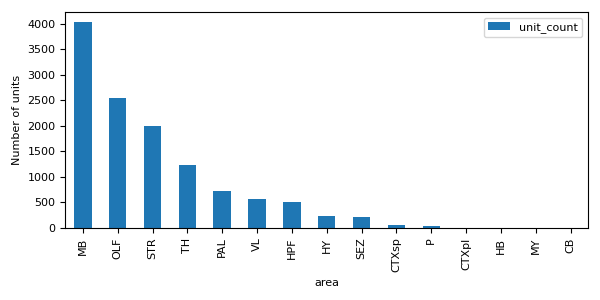

In [42]:
#plot the number of units in each general area, sorted by n units

fig,ax=plt.subplots(1,1,figsize=(6,3))
general_area_counts.sort_values('unit_count',ascending=False).plot.bar(x='area',y='unit_count',ax=ax)
ax.set_ylabel('Number of units')
fig.tight_layout()

In [51]:
general_area_counts['unit_count'].sum()

12125

In [67]:
np.unique(np.hstack(general_area_counts['session_ids'].values)).shape[0]

166

In [68]:
166/248

0.6693548387096774

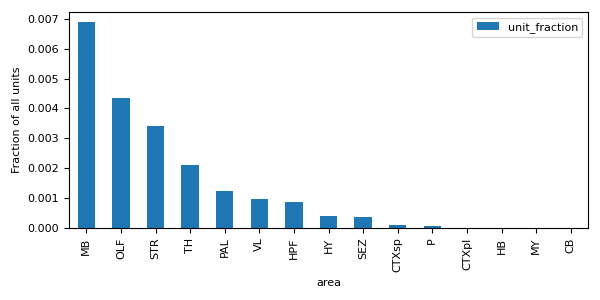

In [44]:
#plot the fraction of units in each general area, sorted by n units

general_area_fraction=general_area_counts.copy()
general_area_fraction['unit_fraction']=general_area_fraction['unit_count']/len(all_units)

fig,ax=plt.subplots(1,1,figsize=(6,3))
general_area_fraction.sort_values('unit_fraction',ascending=False).plot.bar(x='area',y='unit_fraction',ax=ax)
ax.set_ylabel('Fraction of all units')
fig.tight_layout()

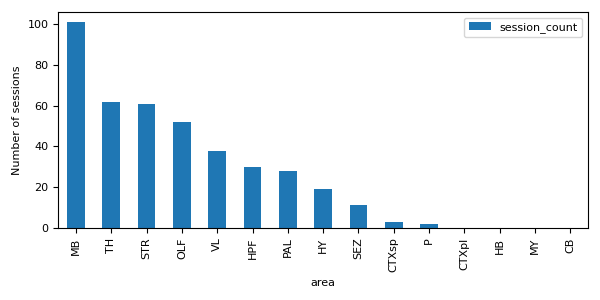

In [43]:
#plot the number of sessions in each general area, sorted by n sessions

fig,ax=plt.subplots(1,1,figsize=(6,3))
general_area_counts.sort_values('session_count',ascending=False).plot.bar(x='area',y='session_count',ax=ax)
ax.set_ylabel('Number of sessions')
fig.tight_layout()

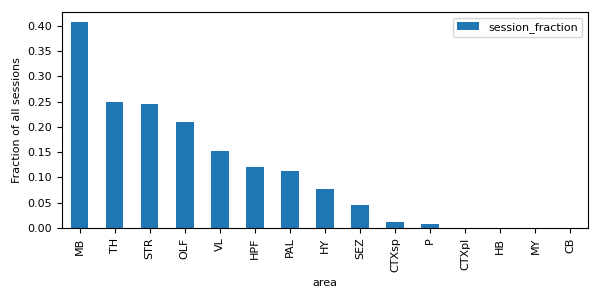

In [45]:
#plot the fraction of sessions in each general area, sorted by n sessions

general_area_fraction=general_area_counts.copy()
general_area_fraction['session_fraction']=general_area_fraction['session_count']/len(all_units['session_id'].unique())

fig,ax=plt.subplots(1,1,figsize=(6,3))
general_area_fraction.sort_values('session_fraction',ascending=False).plot.bar(x='area',y='session_fraction',ax=ax)
ax.set_ylabel('Fraction of all sessions')
fig.tight_layout()


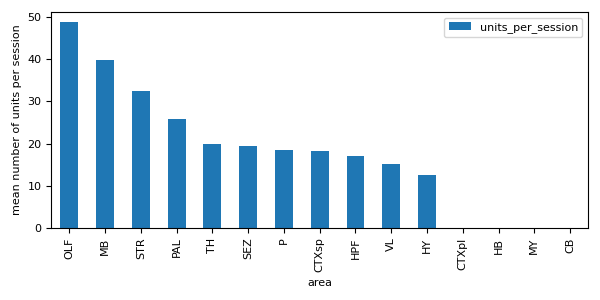

In [46]:
#plot the average number of units per session, sorted

fig,ax=plt.subplots(1,1,figsize=(6,3))
general_area_counts.sort_values('units_per_session',ascending=False).plot.bar(x='area',y='units_per_session',ax=ax)
ax.set_ylabel('mean number of units per session')
fig.tight_layout()

In [48]:
all_units['session_id'].unique().shape[0]

248

## plot unit locations on CCF

In [71]:
from allensdk.core.reference_space_cache import ReferenceSpaceCache
from pathlib import Path

In [72]:
#load CCF

#set this to the directory where you want the CCF to be downloaded
output_dir=r"D:\ccf_cache"
reference_space_key = 'annotation/ccf_2022'
resolution = 10
rspc = ReferenceSpaceCache(resolution, reference_space_key, manifest=Path(output_dir) / 'manifest.json')
# get structure tree
# ID 1 is the adult mouse structure graph
tree = rspc.get_structure_tree(structure_graph_id=1) 
#get id_acronym map
id_acronym_map = tree.get_id_acronym_map()
#make reference space object
rsp = rspc.get_reference_space()
#get annotation volume
annotation, meta = rspc.get_annotation_volume()

2025-03-25 16:15:30,629 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2022/annotation_10.nrrd


In [ ]:
# sel_area='MB'

# area_ccf_coords=all_units.query('structure==@sel_area')[['ccf_ap','ccf_dv','ccf_ml']].values

In [113]:
# type(tree)

In [116]:
acronym='LGd'

structure_info=tree.get_structures_by_acronym([acronym])

parents=tree.get_structures_by_id(structure_info[0]['structure_id_path'])

for parent in parents:
    if parent['acronym']=='root':
        continue
    print(parent['acronym'])
    print(parent['name'])

grey
Basic cell groups and regions
BS
Brain stem
IB
Interbrain
TH
Thalamus
DORsm
Thalamus, sensory-motor cortex related
GENd
Geniculate group, dorsal thalamus
LGd
Dorsal part of the lateral geniculate complex


In [114]:
# tree.get_structures_by_id([313])

In [117]:
structure_info

[{'acronym': 'LGd',
  'graph_id': 1,
  'graph_order': 662,
  'id': 170,
  'name': 'Dorsal part of the lateral geniculate complex',
  'structure_id_path': [997, 8, 343, 1129, 549, 864, 1008, 170],
  'structure_set_ids': [112905828,
   691663206,
   687527945,
   688152363,
   12,
   184527634,
   167587189,
   112905813,
   114512891],
  'rgb_triplet': [255, 128, 132]}]

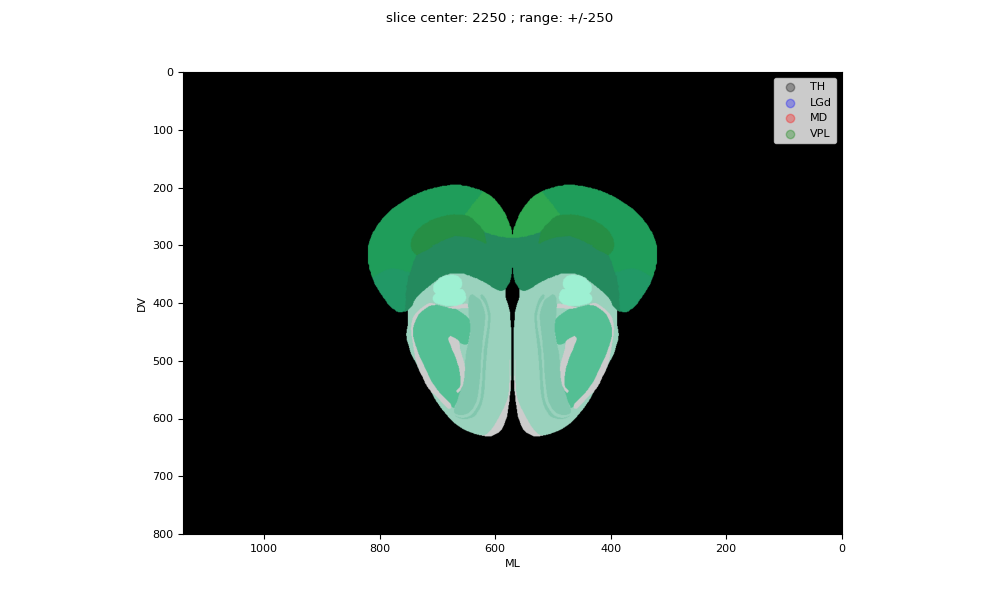

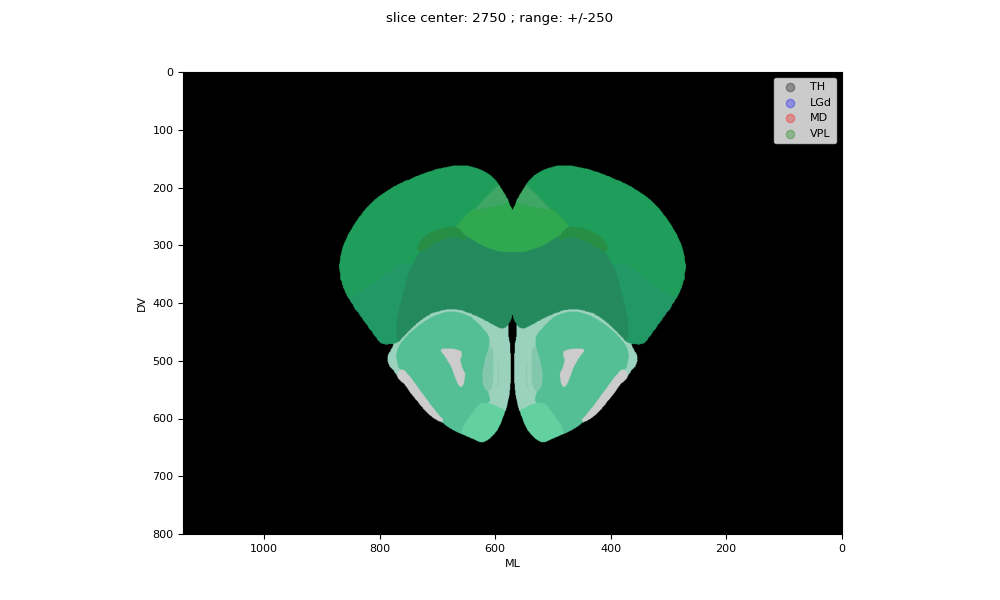

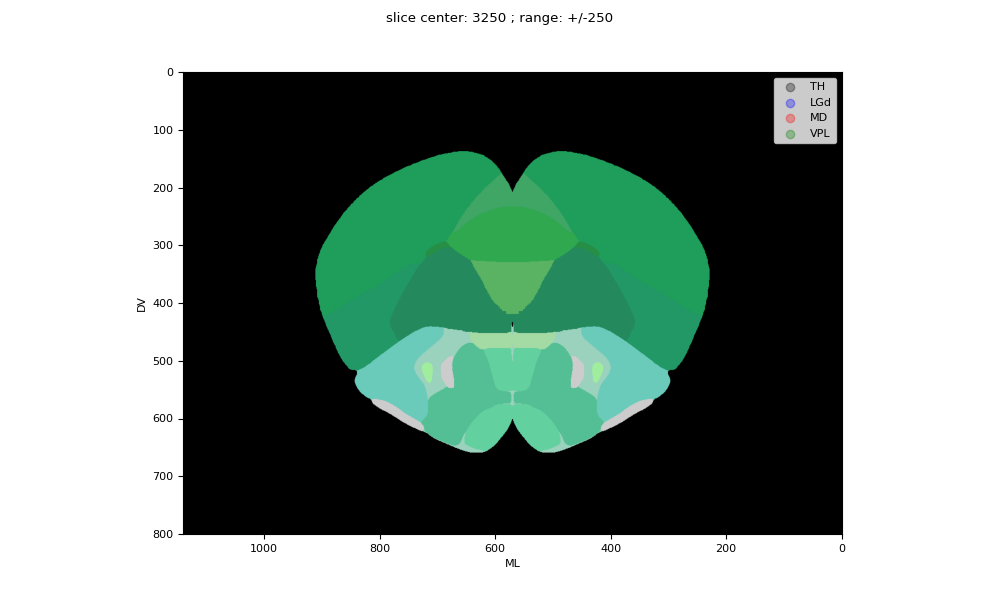

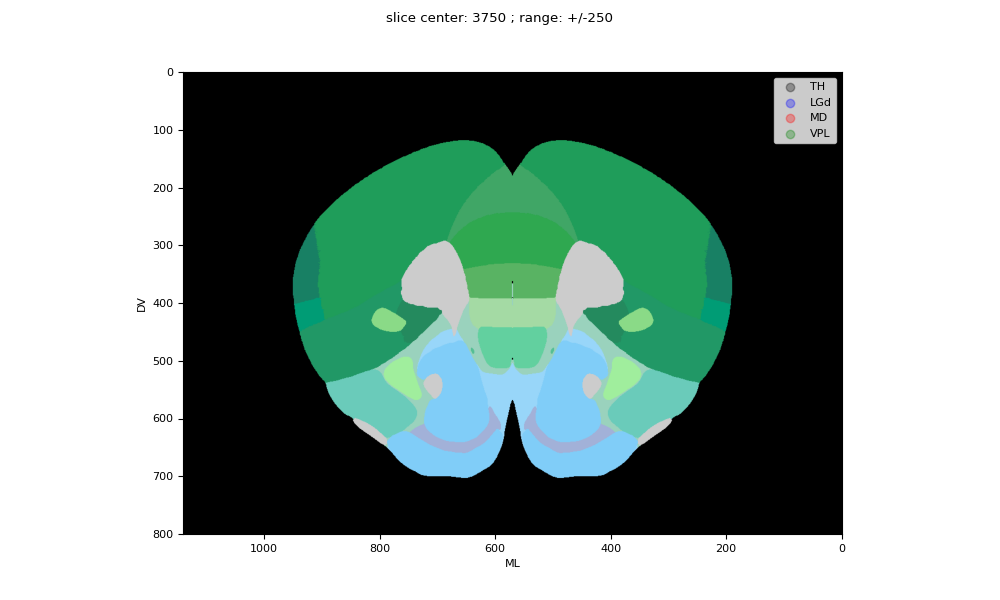

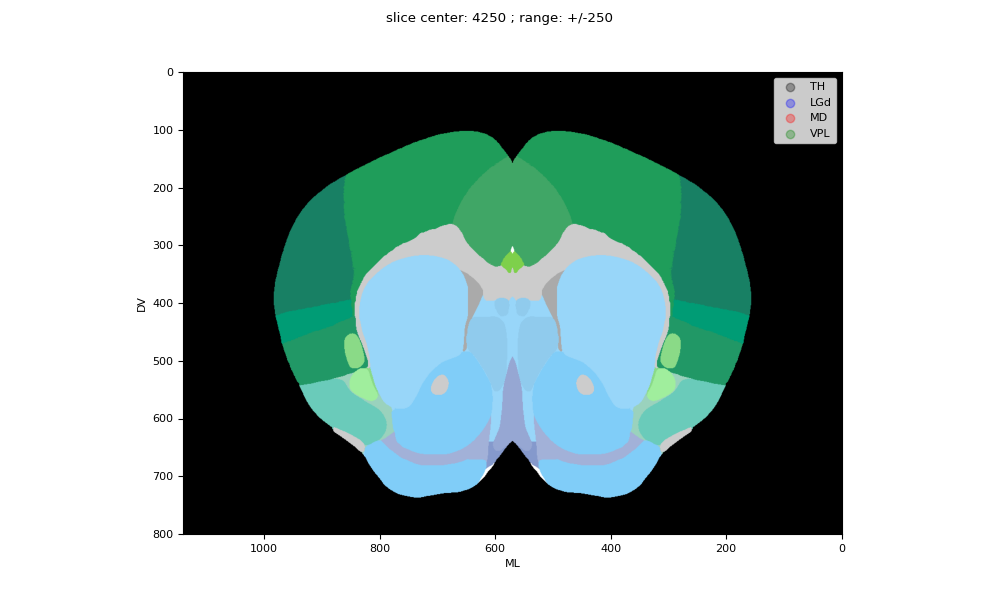

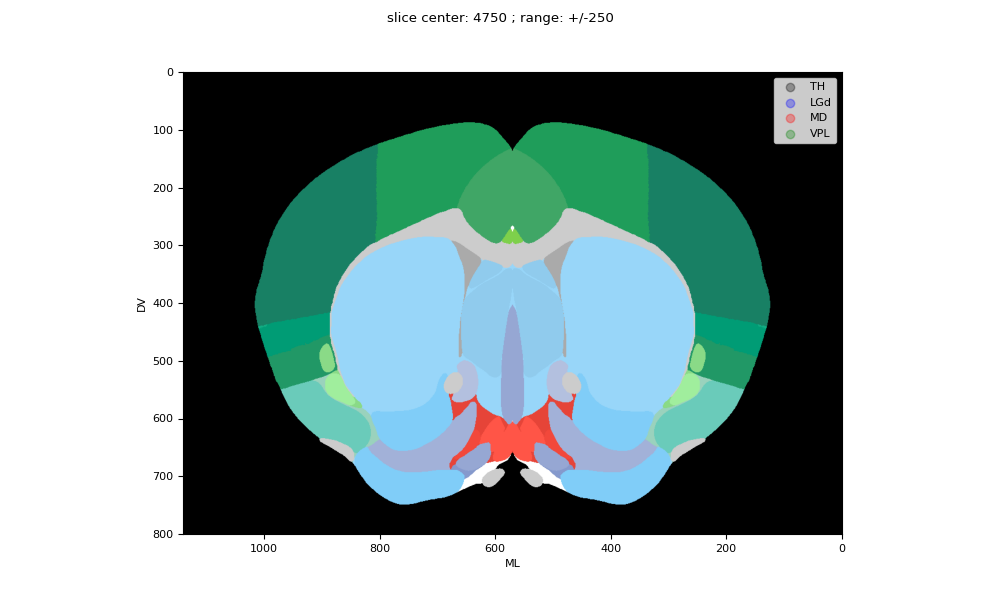

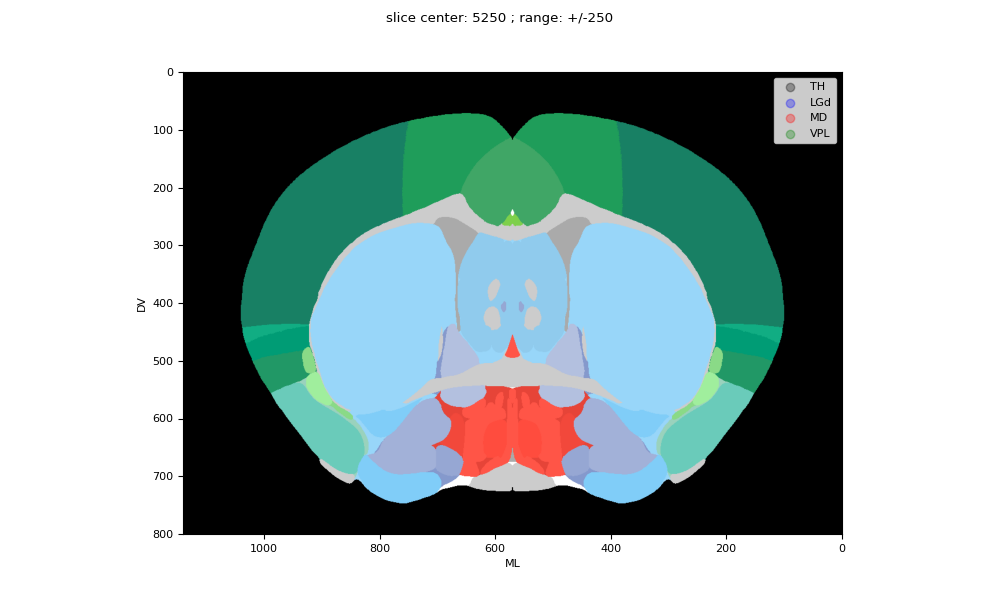

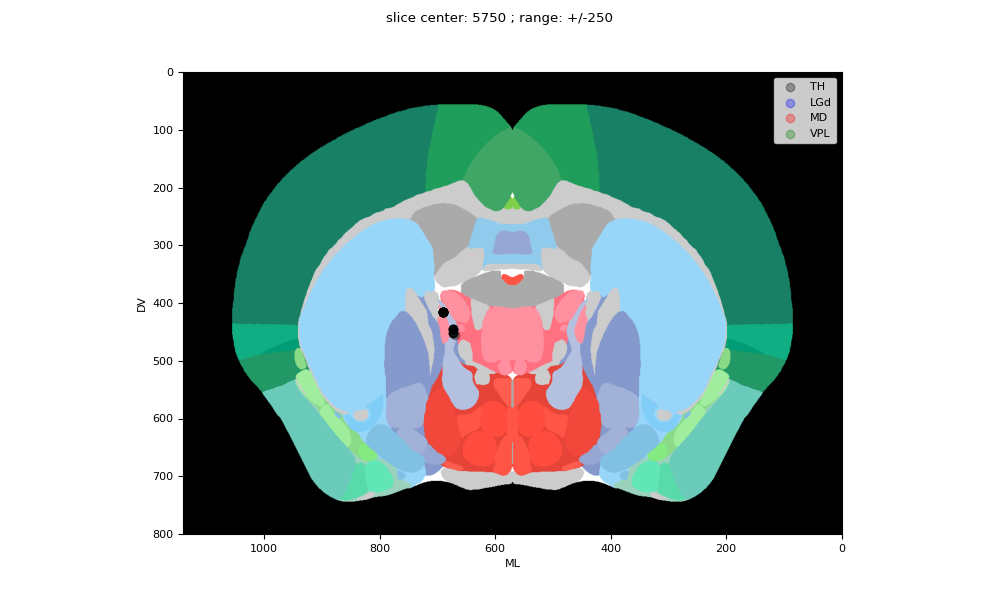

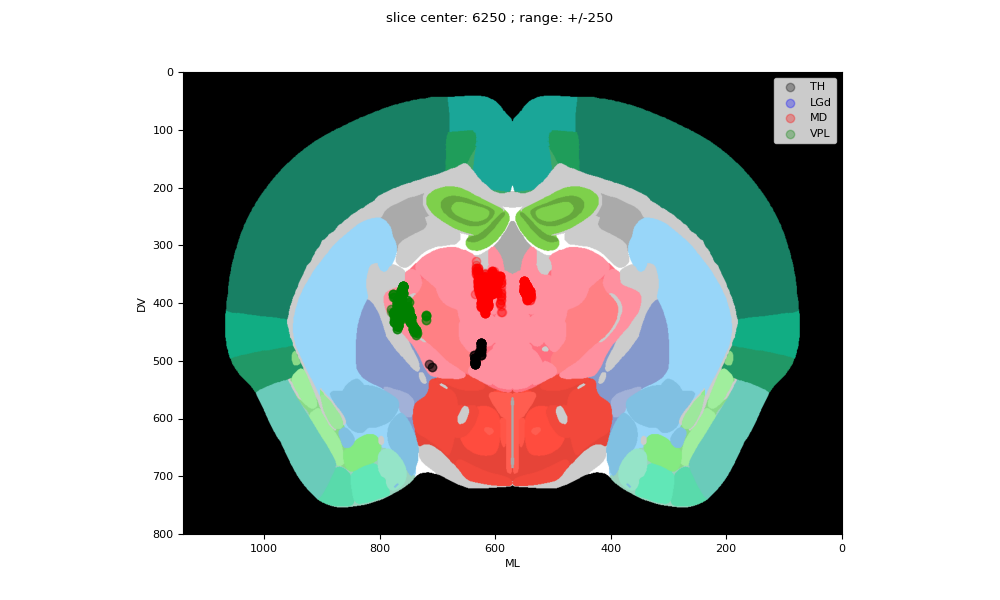

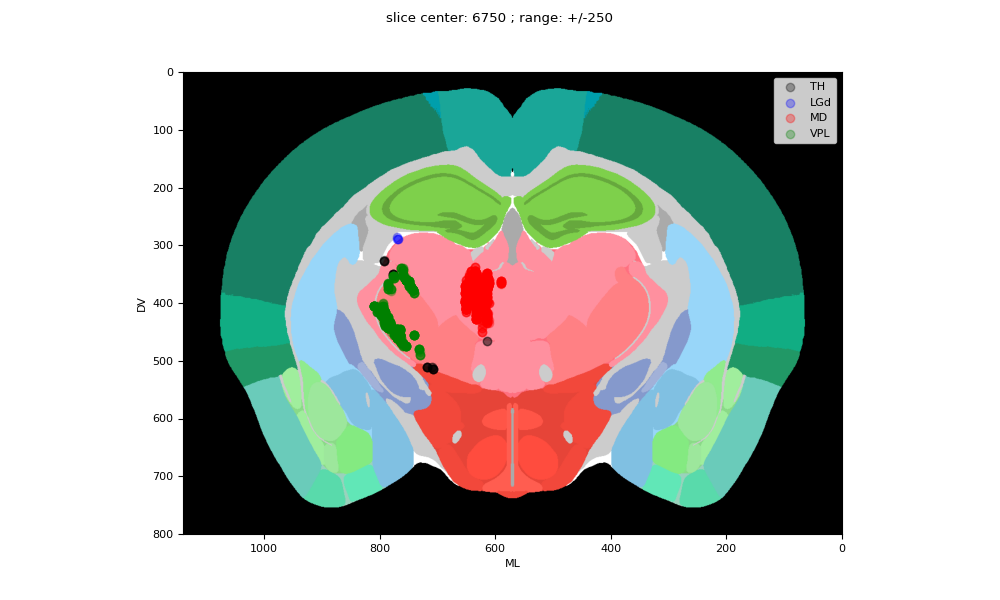

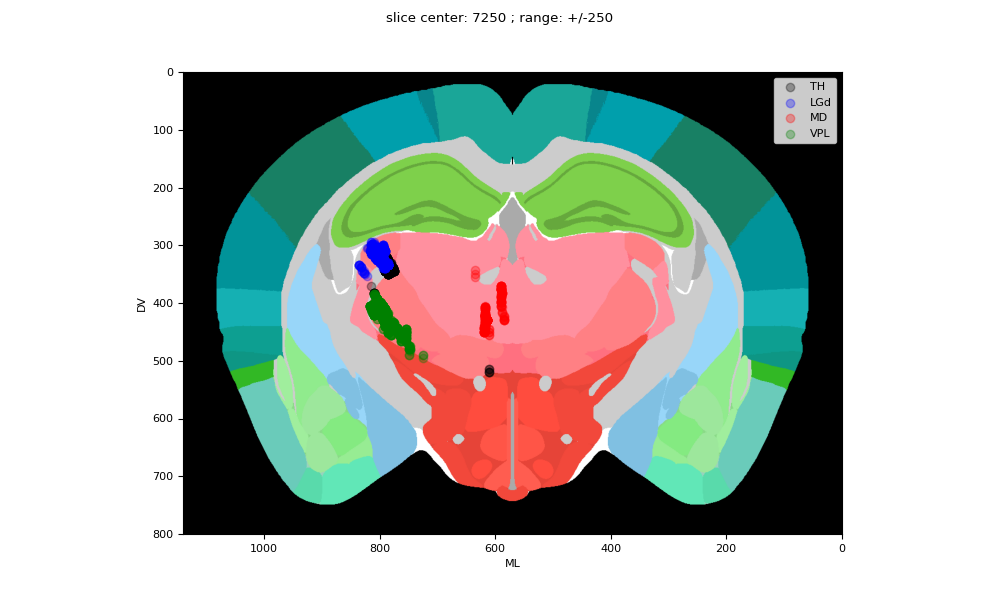

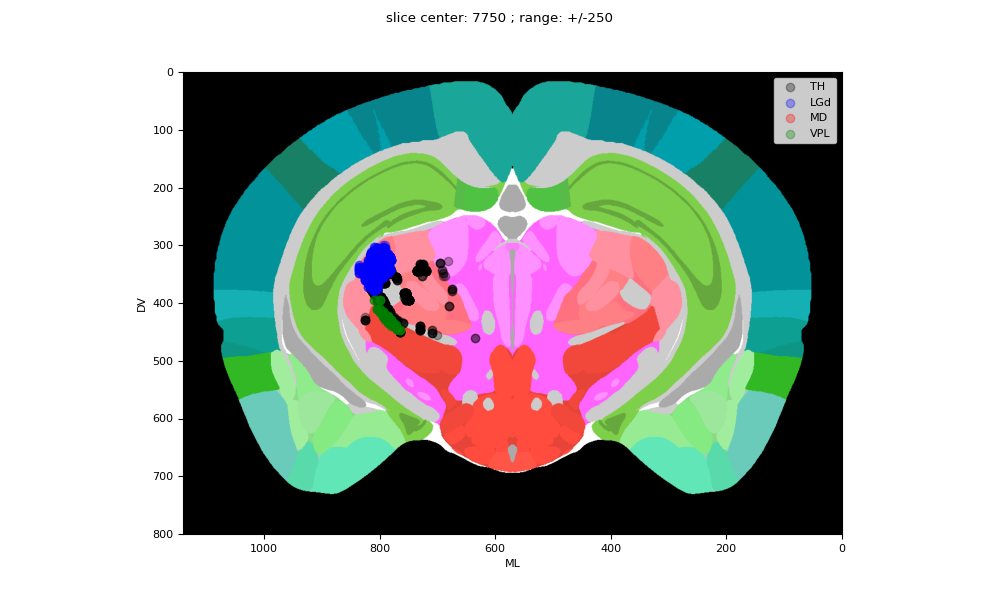

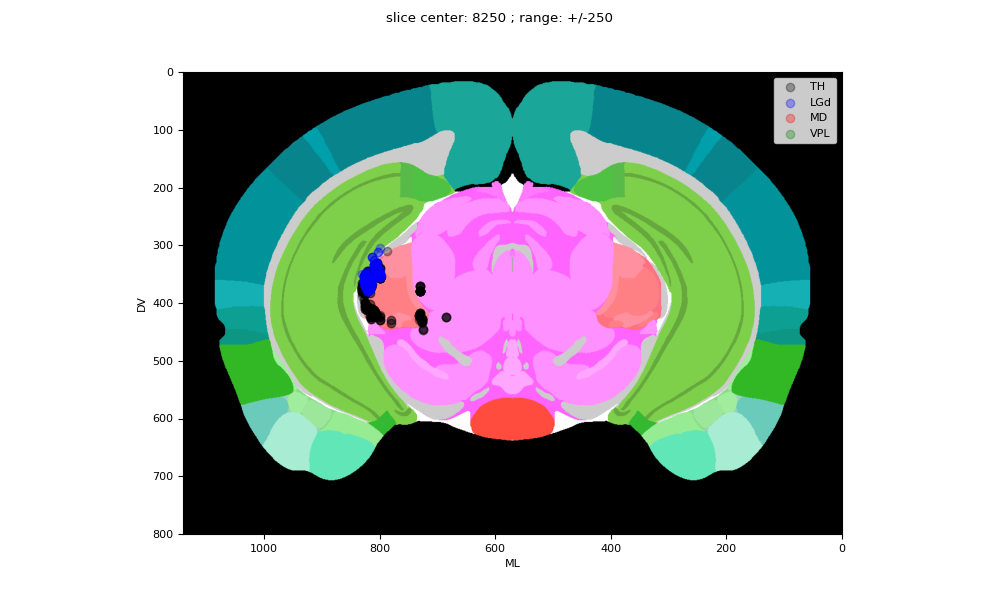

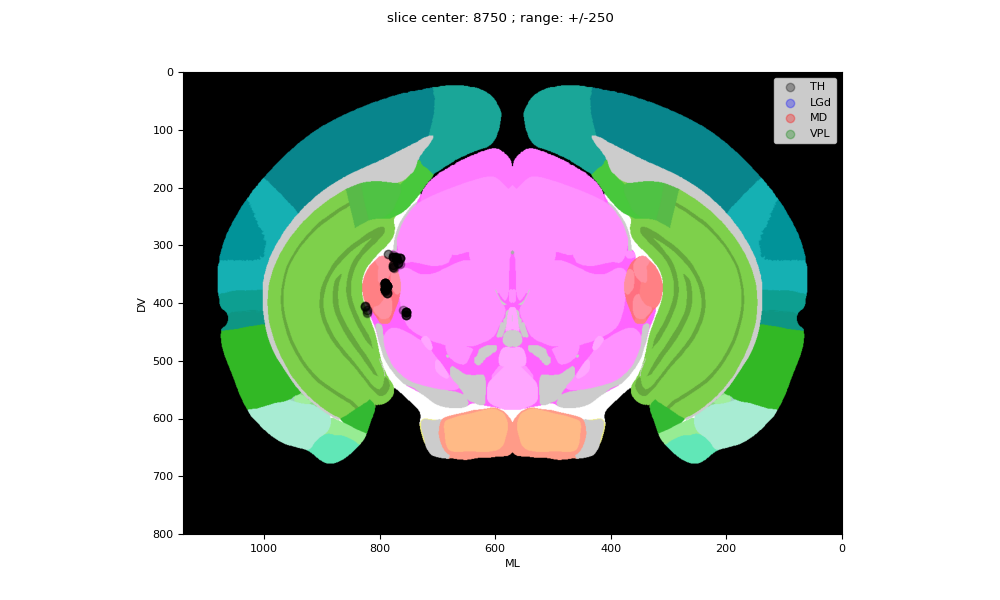

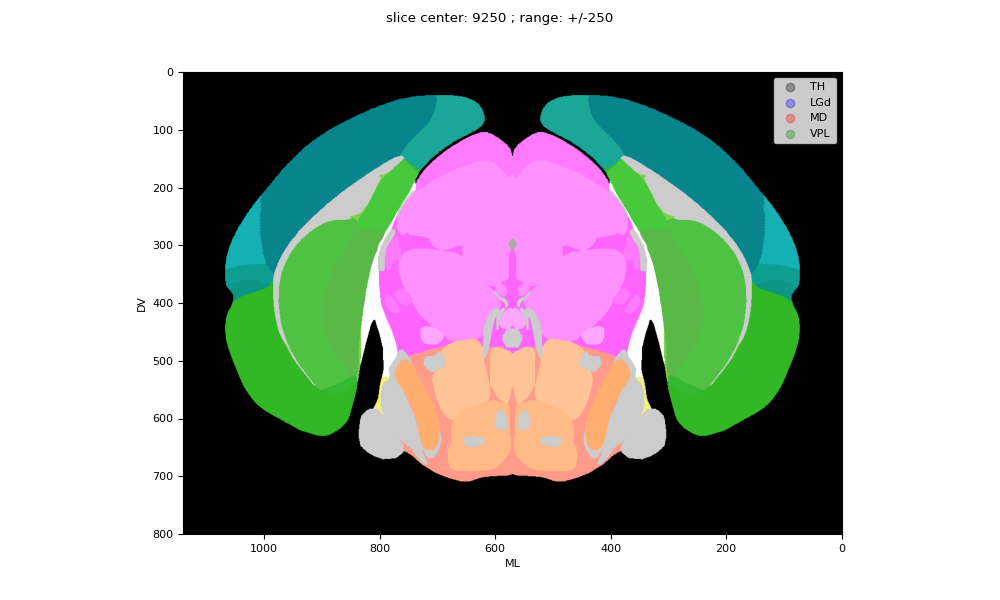

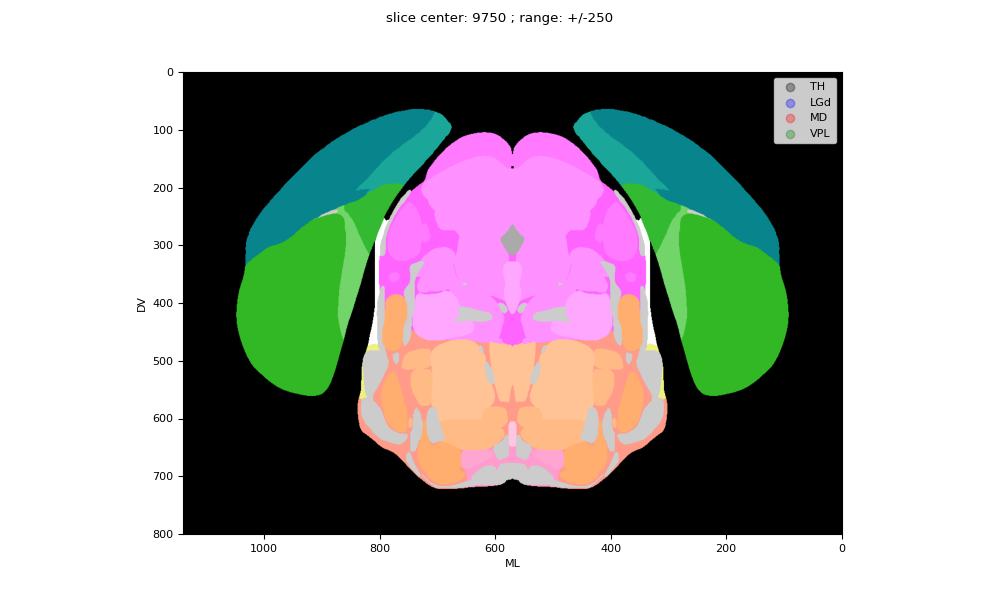

In [89]:
# plot units on successive coronal slices
sel_areas=['TH','LGd','MD','VPL']
# sel_areas=['OLF','MOB','AON']
# sel_areas=['MB','MRN','SCdg','SCig']
# sel_areas=['STR','CP','GPe','ACB']

colors=['k','b','r','g']

slice_size=500
min_slice=5000
max_slice=10000 #10500-ish max
slice_pos_array=np.arange(min_slice+slice_size/2,max_slice,slice_size)


for slice_pos in slice_pos_array[:]:
    slice_image= rsp.get_slice_image(0, slice_pos)
    
    def rgb2gray(rgb):
        return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
    
    gray_image = rgb2gray(slice_image) 

    fig = plt.figure(figsize=(10,6))
    ax=plt.subplot(1,1,1)

    # ax.imshow(gray_image,extent=[1140,0,800,0],cmap='gray')
    ax.imshow(slice_image,extent=[1140,0,800,0])


    xsize=annotation.shape[2]
    ysize=annotation.shape[1]

    for sa,sel_area in enumerate(sel_areas):
        area_units=all_units.query('structure==@sel_area')
        results= area_units.query('ccf_ap >= @slice_pos-@slice_size/2 and ccf_ap < @slice_pos+@slice_size/2')

        xinput=results['ccf_ml'].to_numpy(dtype=float)/10
        yinput=results['ccf_dv'].to_numpy(dtype=float)/10

        points=ax.scatter(1140-results['ccf_ml']/10,results['ccf_dv']/10,alpha=0.3,label=sel_area,color=colors[sa])

    # points=ax.scatter(1140-results['ccf_ml']/10,results['ccf_dv']/10,c=np.abs(results[plot_variable]),alpha=0.5,cmap='Reds')#,vmin=-0.2,vmax=0.2)
    ax.set_xlabel('ML')
    ax.set_ylabel('DV')

    ax.legend()

    fig.suptitle('slice center: '+str(int(slice_pos))+' ; range: +/-'+str(int(slice_size/2)))

    # filesavepath=os.path.join(savepath,plot_variable+'_coronal_slice_'+str(int(slice_pos))+'.png')
    # plt.savefig(filesavepath,dpi=300)
    # plt.close(fig)

In [123]:
from iblatlas.atlas import AllenAtlas
from iblatlas.regions import BrainRegions
ba = AllenAtlas()
br = BrainRegions() # br is also an attribute of ba so could to br = ba.regions

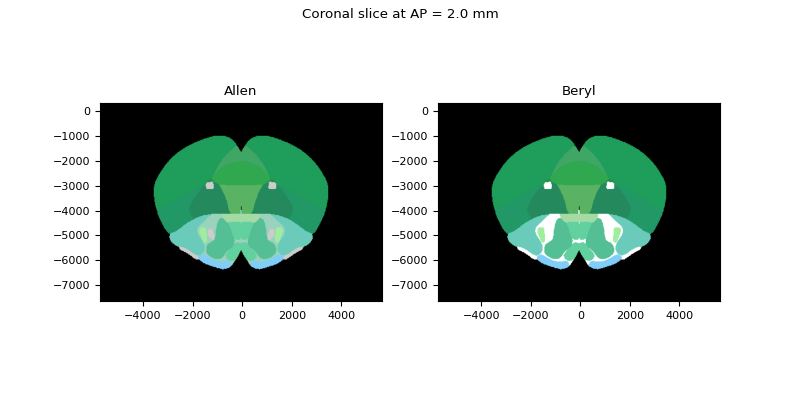

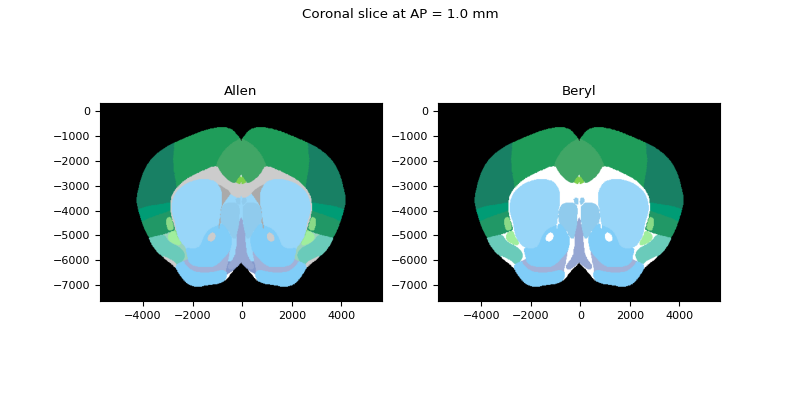

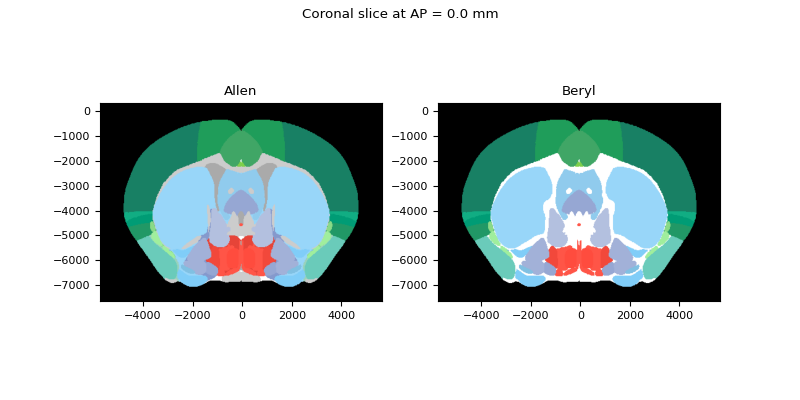

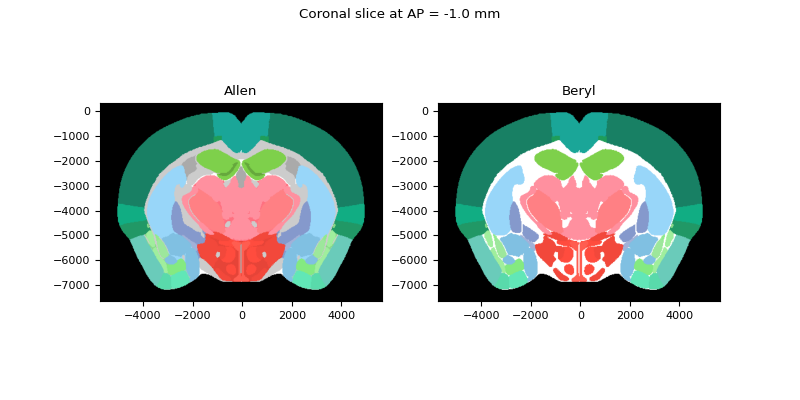

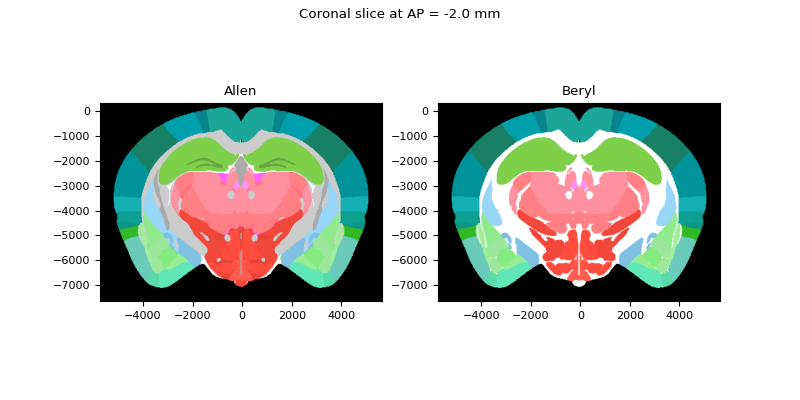

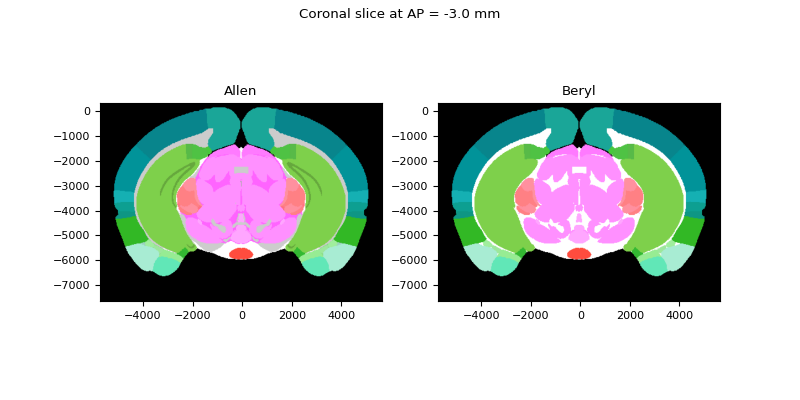

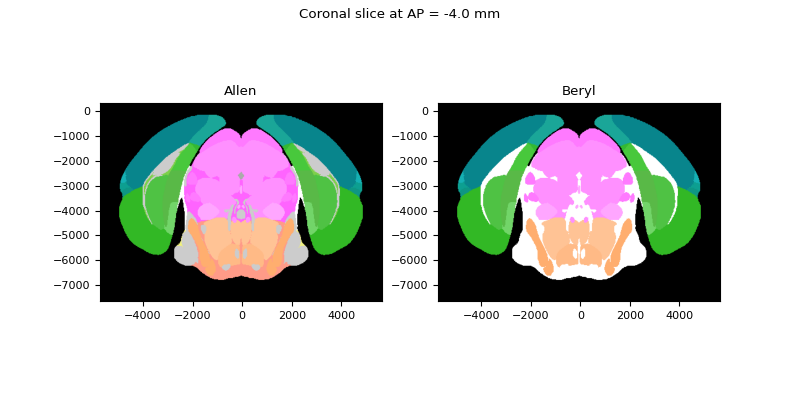

In [139]:
aps = np.array([2000, 1000, 0, -1000 ,-2000, -3000, -4000])/1e6

for ap in aps:
    fig, axs = plt.subplots(1, 2, figsize=(8, 4))
    # Allen mapping
    ba.plot_cslice(ap, volume='annotation', mapping='Allen', ax=axs[0])
    _ = axs[0].set_title('Allen')
    # Beryl mapping
    ba.plot_cslice(ap, volume='annotation', mapping='Beryl', ax=axs[1])
    _ = axs[1].set_title('Beryl')

    fig.suptitle('Coronal slice at AP = ' + str(ap*1000) + ' mm')
